In [13]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.8.0


In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 1s 0us/step


In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)


60000

In [19]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
test_images.shape

(10000, 28, 28)

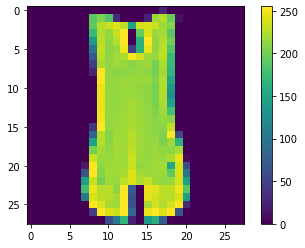

In [25]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()


In [26]:
# Preprocess both train and test
train_images = train_images / 255.0

test_images = test_images / 255.0


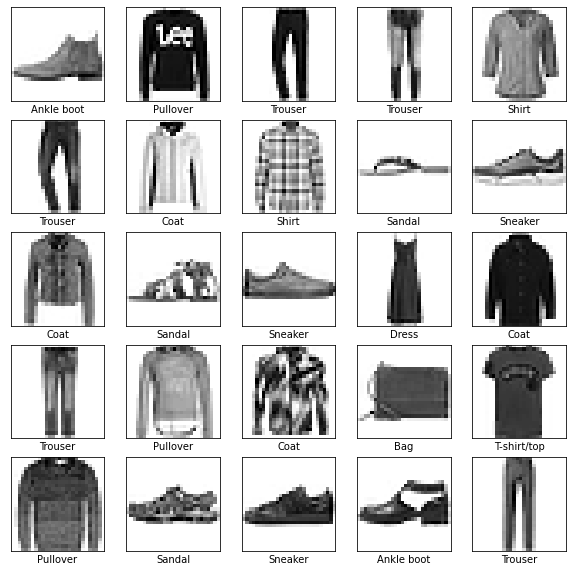

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()


In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [32]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4965 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3747 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3378 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3136 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2716 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2471 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.23

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3527 - accuracy: 0.8796 - 782ms/epoch - 2ms/step

Test accuracy: 0.8795999884605408


In [34]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [35]:
predictions = probability_model.predict(test_images)


In [41]:
for pair in zip(list(predictions[1]), class_names):
    print(pair)


(5.9892518e-05, 'T-shirt/top')
(3.6508465e-14, 'Trouser')
(0.99979645, 'Pullover')
(5.390233e-10, 'Dress')
(8.579558e-05, 'Coat')
(8.918108e-12, 'Sandal')
(5.7978446e-05, 'Shirt')
(2.033656e-12, 'Sneaker')
(2.9201763e-12, 'Bag')
(5.991143e-14, 'Ankle boot')


In [44]:
# Add the image to a batch where it's the only member.
img = test_images[1]

img = (np.expand_dims(img,0))

predictions_single = probability_model.predict(img)


In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


NameError: name 'plot_value_array' is not defined